In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy
from scipy.interpolate import *
import matplotlib.pyplot as plt

print("imports done")

imports done


In [3]:
filePath = r"C:\Users\forre\Desktop\REU\TDA\github\UMR-TDA-2021\pools EDA\pool data\cleaned_data.csv"
df = pd.read_csv(filePath, low_memory = False)
print("dataFrame Made")

dataFrame Made


In [10]:
df = df[df['FLDNUM'] == 4]
df = df[["DATE", "FLDNUM","TN", "TP", "CHLcal", "TURB", "SS", "VEL"]]
feature_names = [c for c in df.columns]
X = np.array(df[feature_names].fillna(0))
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df = df[df['YEAR'].isin([2012, 2013, 2014, 2015, 2016])]
print(df.shape)
df.head()

(1386, 9)


,DATE,FLDNUM,TN,TP,CHLcal,TURB,SS,VEL,YEAR
39531,01/09/2012,4,3.142,0.108,17.31162,9.0,9.6,0.0,2012
39532,01/09/2012,4,3.402,0.112,26.31933,11.0,13.8,NaN,2012
39533,01/09/2012,4,3.793,0.145,22.21055,14.0,16.9,NaN,2012
39534,01/09/2012,4,3.869,0.155,20.63025,16.0,19.1,NaN,2012
39535,01/09/2012,4,4.949,0.261,3.24695,36.0,34.8,0.2,2012


In [16]:
df_mc = df[df['STRATUM']==1]
df_sc = df[df['STRATUM']==2]
df_bw = df[df['STRATUM']==3]
df_sl = df[df['STRATUM']==4]
df_im = df[df['STRATUM']==5]
df_is = df[df['STRATUM']==6]

In [17]:
df_mc.corr()

,STRATUM,TN,TP,CHLcal,TURB,SS,VEL,YEAR
STRATUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TN,NaN,1.000000,-0.042258,-0.350823,0.002238,0.018001,NaN,0.553957
TP,NaN,-0.042258,1.000000,0.206393,0.769894,0.740792,NaN,-0.105045
CHLcal,NaN,-0.350823,0.206393,1.000000,0.352529,0.437135,0.461521,-0.311214
TURB,NaN,0.002238,0.769894,0.352529,1.000000,0.880178,0.679934,-0.039924
SS,NaN,0.018001,0.740792,0.437135,0.880178,1.000000,0.876104,0.002489
VEL,NaN,NaN,NaN,0.461521,0.679934,0.876104,1.000000,0.848555
YEAR,NaN,0.553957,-0.105045,-0.311214,-0.039924,0.002489,0.848555,1.000000


In [18]:
df_sc.corr()

,STRATUM,TN,TP,CHLcal,TURB,SS,VEL,YEAR
STRATUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TN,NaN,1.000000,-0.080530,-0.310635,-0.135882,-0.101939,0.253521,0.487252
TP,NaN,-0.080530,1.000000,0.258081,0.719496,0.630043,0.184984,-0.106491
CHLcal,NaN,-0.310635,0.258081,1.000000,0.359196,0.496930,0.080967,-0.363967
TURB,NaN,-0.135882,0.719496,0.359196,1.000000,0.910005,0.255924,0.000564
SS,NaN,-0.101939,0.630043,0.496930,0.910005,1.000000,0.406699,0.030390
VEL,NaN,0.253521,0.184984,0.080967,0.255924,0.406699,1.000000,0.190423
YEAR,NaN,0.487252,-0.106491,-0.363967,0.000564,0.030390,0.190423,1.000000


In [19]:
df_bw.corr()

,STRATUM,TN,TP,CHLcal,TURB,SS,VEL,YEAR
STRATUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TN,NaN,1.000000,0.074109,-0.030426,0.291884,0.271635,0.400392,0.203744
TP,NaN,0.074109,1.000000,0.274653,0.279076,0.210578,-0.007663,-0.220246
CHLcal,NaN,-0.030426,0.274653,1.000000,0.400102,0.368135,-0.069114,-0.185833
TURB,NaN,0.291884,0.279076,0.400102,1.000000,0.857786,0.357908,-0.126297
SS,NaN,0.271635,0.210578,0.368135,0.857786,1.000000,0.446905,-0.035426
VEL,NaN,0.400392,-0.007663,-0.069114,0.357908,0.446905,1.000000,0.105683
YEAR,NaN,0.203744,-0.220246,-0.185833,-0.126297,-0.035426,0.105683,1.000000


In [20]:
df_sl.corr()

,STRATUM,TN,TP,CHLcal,TURB,SS,VEL,YEAR
STRATUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHLcal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TURB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_im.corr()

,STRATUM,TN,TP,CHLcal,TURB,SS,VEL,YEAR
STRATUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TN,NaN,1.000000,-0.024899,-0.246995,0.041573,0.041895,0.264068,0.454929
TP,NaN,-0.024899,1.000000,0.250863,0.547315,0.505512,0.173454,-0.099486
CHLcal,NaN,-0.246995,0.250863,1.000000,0.372048,0.450226,0.043658,-0.254152
TURB,NaN,0.041573,0.547315,0.372048,1.000000,0.864514,0.355222,-0.061832
SS,NaN,0.041895,0.505512,0.450226,0.864514,1.000000,0.539104,-0.059541
VEL,NaN,0.264068,0.173454,0.043658,0.355222,0.539104,1.000000,0.130768
YEAR,NaN,0.454929,-0.099486,-0.254152,-0.061832,-0.059541,0.130768,1.000000


In [22]:
df_is.corr()

,STRATUM,TN,TP,CHLcal,TURB,SS,VEL,YEAR
STRATUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHLcal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TURB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
known_values = df_bw[["TURB", "TP"]].dropna()
known_values_turb = np.asarray(known_values[["TURB"]]).flatten()
known_values_tp = np.asarray(known_values[["TP"]]).flatten()
reg = LinearRegression().fit(np.asarray(known_values[["TURB"]]), np.asarray(known_values[["TP"]]))

Text(0.5, 0, 'Turbidity')

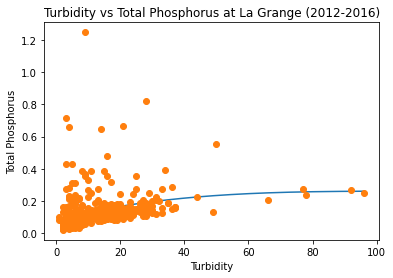

In [26]:
interp_poly = np.polyfit(known_values_turb, known_values_tp, 3)
polynomial = np.poly1d(interp_poly)
xp = np.linspace(known_values_turb.min(),known_values_turb.max(),250)
plt.plot(xp, polynomial(xp))
plt.plot(known_values_turb, known_values_tp, 'o')
plt.title("Turbidity vs Total Phosphorus at La Grange (2012-2016)")
plt.ylabel("Total Phosphorus")
plt.xlabel("Turbidity")

In [168]:
len(known_values_tp)

28

In [188]:
polynomial(100)

0.3285745869603091

In [260]:
df = df.reset_index(drop = True)
naIndices = np.argwhere(np.isnan(np.array(df["TP"]))).flatten()

predicted_tp = []
used_turbs = []
for index in naIndices:
    used_turbs.append(df.iloc[index][["TURB"]][0])
used_turbs = [x for x in used_turbs if x < 300]
for turb in used_turbs:
    predicted_tp.append(polynomial(turb))

Text(0.5, 0, 'Turbidity')

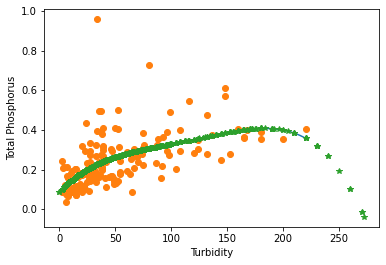

In [261]:
plt.plot(xp, polynomial(xp))
plt.plot(known_values_turb, known_values_tp, 'o')
plt.plot(used_turbs, predicted_tp, '*')
plt.ylabel("Total Phosphorus")
plt.xlabel("Turbidity")

In [250]:
len(used_turbs)
len(used_turbs[0:-5])

1495

In [258]:
used_turbs = [x for x in used_turbs if x < 300]

In [259]:
max(used_turbs)

272.0